# Preprocess the CheXpert dataset 

We follow broadly the same splits and preprocessing steps as Glocker et al. https://github.com/biomedia-mira/chexploration/blob/main/notebooks/chexpert.sample.ipynb 

First, follow the steps in the link above to get splits consistent with Glocker et al. and to preprocess the data. At this point, your data dir should contain a `preproc_224x224/` dir with the preprocessed images. You should also have generated `chexpert.sample.csv` using the notebook above.

The rest of this notebook adapts these splits to be more consistent with our project.

Since the final splits are uploaded in this repo, there is no need to run this notebook again if your data is as described above. It is just included so you can reproduce the splits with changes if needed.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# where we saved chexpert.sample.csv from Glocker et al
TMP_SPLIT_DIR = "/mnt/CheXpert-v1.0/meta/reading_race"   
SPLIT_DIR = "../splits/chexpert/"  # where we will save our final split csv files

df = pd.read_csv(os.path.join(TMP_SPLIT_DIR, "chexpert.sample.csv"))
df

,Unnamed: 0.1,patient_id,race,ethnicity,Path,sex,age,Frontal/Lateral,AP/PA,No Finding,...,Pleural Other,Fracture,Support Devices,Unnamed: 0,split,race_label,sex_label,disease,disease_label,path_preproc
0,0,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study22/view1...,Male,59,Frontal,AP,NaN,...,NaN,NaN,1.0,53688.0,train,0,0,Other,2,preproc_224x224/patient24428_study22_view1_fro...
1,1,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study39/view1...,Male,61,Frontal,PA,NaN,...,NaN,NaN,NaN,53689.0,train,0,0,Other,2,preproc_224x224/patient24428_study39_view1_fro...
2,2,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study61/view1...,Male,61,Frontal,AP,NaN,...,NaN,NaN,1.0,53690.0,train,0,0,Pleural Effusion,1,preproc_224x224/patient24428_study61_view1_fro...
3,3,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study35/view1...,Male,60,Frontal,AP,NaN,...,NaN,NaN,1.0,53691.0,train,0,0,Other,2,preproc_224x224/patient24428_study35_view1_fro...
4,4,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study45/view1...,Male,61,Frontal,AP,NaN,...,NaN,NaN,1.0,53692.0,train,0,0,Pleural Effusion,1,preproc_224x224/patient24428_study45_view1_fro...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127113,127113,patient02799,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient02799/study1/view1_...,Male,40,Frontal,AP,1.0,...,NaN,NaN,1.0,6110.0,test,0,0,No Finding,0,preproc_224x224/patient02799_study1_view1_fron...
127114,127114,patient22486,Asian,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient22486/study1/view1_...,Male,52,Frontal,AP,NaN,...,NaN,NaN,NaN,49372.0,test,1,0,Pleural Effusion,1,preproc_224x224/patient22486_study1_view1_fron...
127115,127115,patient05143,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient05143/study3/view1_...,Male,24,Frontal,PA,NaN,...,NaN,NaN,1.0,11138.0,test,0,0,Other,2,preproc_224x224/patient05143_study3_view1_fron...
127116,127116,patient05143,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient05143/study1/view1_...,Male,24,Frontal,AP,1.0,...,NaN,NaN,1.0,11139.0,test,0,0,No Finding,0,preproc_224x224/patient05143_study1_view1_fron...


There already exist columns for race_label, sex_label etc... We create new ones called "Race", "Sex", "Age" with the binary labels we use in this project.

In [2]:
df['race'].unique()

df['Race'] = df["race"]
# two race subgroups (white -> 0 vs. non-white -> 1)
df.loc[df['race'] == "White", 'Race'] = 0
df.loc[df['race'] != "White", 'Race'] = 1

df['Sex'] = df['sex']
# two sex subgroups (male -> 0 , female -> 1)
df.loc[df['sex'] == 'Male', 'Sex'] = 0
df.loc[df['sex'] == 'Female', 'Sex'] = 1

# two age subgroups (0-60 -> 0 , 60+ -> 1)
df['Age'] = df['age']

df.loc[df['age'] < 60, 'Age'] = 0
df.loc[df['age'] >= 60, 'Age'] = 1

df

,Unnamed: 0.1,patient_id,race,ethnicity,Path,sex,age,Frontal/Lateral,AP/PA,No Finding,...,Unnamed: 0,split,race_label,sex_label,disease,disease_label,path_preproc,Race,Sex,Age
0,0,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study22/view1...,Male,59,Frontal,AP,NaN,...,53688.0,train,0,0,Other,2,preproc_224x224/patient24428_study22_view1_fro...,0,0,0
1,1,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study39/view1...,Male,61,Frontal,PA,NaN,...,53689.0,train,0,0,Other,2,preproc_224x224/patient24428_study39_view1_fro...,0,0,1
2,2,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study61/view1...,Male,61,Frontal,AP,NaN,...,53690.0,train,0,0,Pleural Effusion,1,preproc_224x224/patient24428_study61_view1_fro...,0,0,1
3,3,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study35/view1...,Male,60,Frontal,AP,NaN,...,53691.0,train,0,0,Other,2,preproc_224x224/patient24428_study35_view1_fro...,0,0,1
4,4,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study45/view1...,Male,61,Frontal,AP,NaN,...,53692.0,train,0,0,Pleural Effusion,1,preproc_224x224/patient24428_study45_view1_fro...,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127113,127113,patient02799,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient02799/study1/view1_...,Male,40,Frontal,AP,1.0,...,6110.0,test,0,0,No Finding,0,preproc_224x224/patient02799_study1_view1_fron...,0,0,0
127114,127114,patient22486,Asian,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient22486/study1/view1_...,Male,52,Frontal,AP,NaN,...,49372.0,test,1,0,Pleural Effusion,1,preproc_224x224/patient22486_study1_view1_fron...,1,0,0
127115,127115,patient05143,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient05143/study3/view1_...,Male,24,Frontal,PA,NaN,...,11138.0,test,0,0,Other,2,preproc_224x224/patient05143_study3_view1_fron...,0,0,0
127116,127116,patient05143,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient05143/study1/view1_...,Male,24,Frontal,AP,1.0,...,11139.0,test,0,0,No Finding,0,preproc_224x224/patient05143_study1_view1_fron...,0,0,0


We also create a 'binaryLabel' column where no finding is 1 and any finding is 0. This is the label we use for the binary classification task.

I know it's a bit unintuitive but it keeps our binary classification task consistent with MEDFAIR.

In [3]:
labels = [
    'No Finding',
    'Enlarged Cardiomediastinum',
    'Cardiomegaly',
    'Lung Opacity',
    'Lung Lesion',
    'Edema',
    'Consolidation',
    'Pneumonia',
    'Atelectasis',
    'Pneumothorax',
    'Pleural Effusion',
    'Pleural Other',
    'Fracture',
    'Support Devices']

In [4]:
# convert to binary labels: no finding -> 0, other -> 1
df['disease'] = df[labels[0]]
df.loc[df[labels[0]] == 1, 'disease'] = labels[0]
df.loc[df['disease'].isna(), 'disease'] = 'Other'

df['binaryLabel'] = df['disease']
df.loc[df['disease'] == labels[0], 'binaryLabel'] = 0
df.loc[df['disease'] == 'Other', 'binaryLabel'] = 1

df

,Unnamed: 0.1,patient_id,race,ethnicity,Path,sex,age,Frontal/Lateral,AP/PA,No Finding,...,split,race_label,sex_label,disease,disease_label,path_preproc,Race,Sex,Age,binaryLabel
0,0,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study22/view1...,Male,59,Frontal,AP,NaN,...,train,0,0,Other,2,preproc_224x224/patient24428_study22_view1_fro...,0,0,0,1
1,1,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study39/view1...,Male,61,Frontal,PA,NaN,...,train,0,0,Other,2,preproc_224x224/patient24428_study39_view1_fro...,0,0,1,1
2,2,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study61/view1...,Male,61,Frontal,AP,NaN,...,train,0,0,Other,1,preproc_224x224/patient24428_study61_view1_fro...,0,0,1,1
3,3,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study35/view1...,Male,60,Frontal,AP,NaN,...,train,0,0,Other,2,preproc_224x224/patient24428_study35_view1_fro...,0,0,1,1
4,4,patient24428,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient24428/study45/view1...,Male,61,Frontal,AP,NaN,...,train,0,0,Other,1,preproc_224x224/patient24428_study45_view1_fro...,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127113,127113,patient02799,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient02799/study1/view1_...,Male,40,Frontal,AP,1.0,...,test,0,0,No Finding,0,preproc_224x224/patient02799_study1_view1_fron...,0,0,0,0
127114,127114,patient22486,Asian,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient22486/study1/view1_...,Male,52,Frontal,AP,NaN,...,test,1,0,Other,1,preproc_224x224/patient22486_study1_view1_fron...,1,0,0,1
127115,127115,patient05143,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient05143/study3/view1_...,Male,24,Frontal,PA,NaN,...,test,0,0,Other,2,preproc_224x224/patient05143_study3_view1_fron...,0,0,0,1
127116,127116,patient05143,White,Non-Hispanic/Non-Latino,CheXpert-v1.0/train/patient05143/study1/view1_...,Male,24,Frontal,AP,1.0,...,test,0,0,No Finding,0,preproc_224x224/patient05143_study1_view1_fron...,0,0,0,0


In [5]:
# replace Path column with path_preproc
# this is to point us to the preprocessed images

df['Path'] = df['path_preproc']
df

,Unnamed: 0.1,patient_id,race,ethnicity,Path,sex,age,Frontal/Lateral,AP/PA,No Finding,...,split,race_label,sex_label,disease,disease_label,path_preproc,Race,Sex,Age,binaryLabel
0,0,patient24428,White,Non-Hispanic/Non-Latino,preproc_224x224/patient24428_study22_view1_fro...,Male,59,Frontal,AP,NaN,...,train,0,0,Other,2,preproc_224x224/patient24428_study22_view1_fro...,0,0,0,1
1,1,patient24428,White,Non-Hispanic/Non-Latino,preproc_224x224/patient24428_study39_view1_fro...,Male,61,Frontal,PA,NaN,...,train,0,0,Other,2,preproc_224x224/patient24428_study39_view1_fro...,0,0,1,1
2,2,patient24428,White,Non-Hispanic/Non-Latino,preproc_224x224/patient24428_study61_view1_fro...,Male,61,Frontal,AP,NaN,...,train,0,0,Other,1,preproc_224x224/patient24428_study61_view1_fro...,0,0,1,1
3,3,patient24428,White,Non-Hispanic/Non-Latino,preproc_224x224/patient24428_study35_view1_fro...,Male,60,Frontal,AP,NaN,...,train,0,0,Other,2,preproc_224x224/patient24428_study35_view1_fro...,0,0,1,1
4,4,patient24428,White,Non-Hispanic/Non-Latino,preproc_224x224/patient24428_study45_view1_fro...,Male,61,Frontal,AP,NaN,...,train,0,0,Other,1,preproc_224x224/patient24428_study45_view1_fro...,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127113,127113,patient02799,White,Non-Hispanic/Non-Latino,preproc_224x224/patient02799_study1_view1_fron...,Male,40,Frontal,AP,1.0,...,test,0,0,No Finding,0,preproc_224x224/patient02799_study1_view1_fron...,0,0,0,0
127114,127114,patient22486,Asian,Non-Hispanic/Non-Latino,preproc_224x224/patient22486_study1_view1_fron...,Male,52,Frontal,AP,NaN,...,test,1,0,Other,1,preproc_224x224/patient22486_study1_view1_fron...,1,0,0,1
127115,127115,patient05143,White,Non-Hispanic/Non-Latino,preproc_224x224/patient05143_study3_view1_fron...,Male,24,Frontal,PA,NaN,...,test,0,0,Other,2,preproc_224x224/patient05143_study3_view1_fron...,0,0,0,1
127116,127116,patient05143,White,Non-Hispanic/Non-Latino,preproc_224x224/patient05143_study1_view1_fron...,Male,24,Frontal,AP,1.0,...,test,0,0,No Finding,0,preproc_224x224/patient05143_study1_view1_fron...,0,0,0,0


In [6]:
# split and save
df_train = df[df.split=="train"]
df_val = df[df.split=="validate"]
df_test = df[df.split=="test"]

df_train.to_csv(os.path.join(SPLIT_DIR, "train.csv"))
df_val.to_csv(os.path.join(SPLIT_DIR, "val.csv"))
df_test.to_csv(os.path.join(SPLIT_DIR, "test.csv"))

## Splits are done, now visualise the data and get some summary statistics

sanity check
Image shape: (224, 224), Image type: uint8, Image range: 0 - 254, Age: 0, Sex: 0, Race: 0, Disease: 1


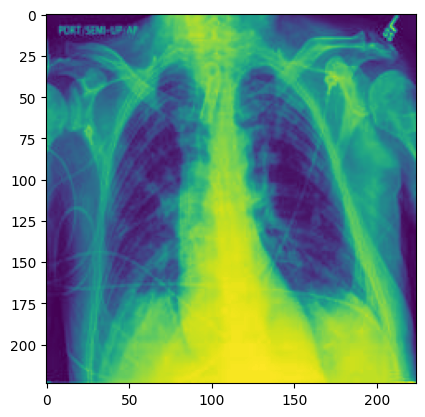

In [7]:
DATA_DIR = "/mnt/CheXpert-v1.0/"

print("sanity check")
img = plt.imread(os.path.join(DATA_DIR, df["Path"].values[0]))  # type: ignore
print(
    f"Image shape: {img.shape}, Image type: {img.dtype}, Image range: {img.min()} -"
    f" {img.max()}, Age: {df['Age'].values[0]}, Sex:"
    f" {df['Age'].values[0]}, Race: {df['Race'].values[0]}"
    f", Disease: {df['binaryLabel'].values[0]}"
)
plt.imshow(img)

In [8]:
num_images = df.shape[0]
print(f"Number of images: {num_images}")

num_patients = len(df["patient_id"].unique())
print(f"Number of patients: {num_patients}")

num_male = len(df[df["Sex"] == 0])
print(f"Number of Males: {num_male}")

num_female = len(df[df["Sex"] == 1])
print(f"Number of Females: {num_female}")

assert num_male + num_female == num_images

num_under_60 = len(df[df["Age"] == 0])
print(f"Number of Under 60: {num_under_60}")

num_over_60 = len(df[df["Age"] == 1])
print(f"Number of Over 60: {num_over_60}")

assert num_under_60 + num_over_60 == num_images

num_white = len(df[df["Race"] == 0])
print(f"Number of White: {num_white}")

num_non_white = len(df[df["Race"] == 1])
print(f"Number of Non-White: {num_non_white}")

num_benign = len(df[df["binaryLabel"] == 0])
print(f"Number of findings: {num_benign}")

num_malignant = len(df[df["binaryLabel"] == 1])
print(f"Number of no-findings: {num_malignant}")

assert num_benign + num_malignant == num_images

Number of images: 127118
Number of patients: 42884
Number of Males: 74682
Number of Females: 52436
Number of Under 60: 49856
Number of Over 60: 77262
Number of White: 99027
Number of Non-White: 28091
Number of findings: 10916
Number of no-findings: 116202


In [9]:

print(f"percentage of male images: {num_male / num_images * 100}")
print(f"percentage of female images: {num_female / num_images * 100}")

num_male_positive_label = len(df[df["Sex"] == 0][df["binaryLabel"] == 1])
num_male_negative_label = len(df[df["Sex"] == 0][df["binaryLabel"] == 0])
assert num_male_positive_label + num_male_negative_label == num_male

print(f"prevalence of positive class in male: {num_male_positive_label / num_male * 100}")

num_female_positive_label = len(df[df["Sex"] == 1][df["binaryLabel"] == 1])
print(f"prevalence of positive class in female: {num_female_positive_label / num_female * 100}")

print(f"percentage of under 60 images: {num_under_60 / num_images * 100}")

num_under_60_positive_label = len(df[df["Age"] == 0][df["binaryLabel"] == 1])
print(f"prevalence of positive class in under 60: {num_under_60_positive_label / num_under_60 * 100}")

print(f"percentage of over 60 images: {num_over_60 / num_images * 100}")

num_over_60_positive_label = len(df[df["Age"] == 1][df["binaryLabel"] == 1])
print(f"prevalence of positive class in over 60: {num_over_60_positive_label / num_over_60 * 100}")

print(f"percentage of white images: {num_white / num_images * 100}")

num_white_positive_label = len(df[df["Race"] == 0][df["binaryLabel"] == 1])
print(f"prevalence of positive class in white: {num_white_positive_label / num_white * 100}")

print(f"percentage of non-white images: {num_non_white / num_images * 100}")

num_non_white_positive_label = len(df[df["Race"] == 1][df["binaryLabel"] == 1])

print(f"prevalence of positive class in non-white: {num_non_white_positive_label / num_non_white * 100}")


percentage of male images: 58.75013766736418
percentage of female images: 41.249862332635814
prevalence of positive class in male: 91.59101255992073
prevalence of positive class in female: 91.15874589976352
percentage of under 60 images: 39.22025204927705
prevalence of positive class in under 60: 87.06474646983312
percentage of over 60 images: 60.77974795072295
prevalence of positive class in over 60: 94.21837384483963
percentage of white images: 77.90163470161582


/tmp/ipykernel_839221/1379661903.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_male_positive_label = len(df[df["Sex"] == 0][df["binaryLabel"] == 1])
/tmp/ipykernel_839221/1379661903.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_male_negative_label = len(df[df["Sex"] == 0][df["binaryLabel"] == 0])
/tmp/ipykernel_839221/1379661903.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_female_positive_label = len(df[df["Sex"] == 1][df["binaryLabel"] == 1])
/tmp/ipykernel_839221/1379661903.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_under_60_positive_label = len(df[df["Age"] == 0][df["binaryLabel"] == 1])
/tmp/ipykernel_839221/1379661903.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_over_60_positive_label = len(df[df["Age"] == 1][df["binaryLabel"] == 1])
/tmp/ipykernel_839221/1379661903.

prevalence of positive class in white: 91.68307633271733
percentage of non-white images: 22.098365298384177
prevalence of positive class in non-white: 90.45957780071909


/tmp/ipykernel_839221/1379661903.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_non_white_positive_label = len(df[df["Race"] == 1][df["binaryLabel"] == 1])
